<center><img src="imagen/Como descomponer una serie temporal y Por que.png" width="800" height="500"></center>

# ¿Comó descomponer una serie temporal y Por qué?

En el análisis de series temporales para pronosticar nuevos valores, es muy importante conocer los datos pasados. Más formalmente, podemos decir que es muy importante conocer los patrones que siguen los valores con el tiempo. Puede haber muchas razones que hacen que nuestros valores pronosticados caigan en la dirección equivocada. Básicamente, una serie temporal consta de cuatro componentes. La variación de esos componentes causa el cambio en el patrón de la serie temporal. Estos componentes son:

* `Nivel:` Es el valor principal que va en promedio con el tiempo.
* `Tendencia:` La tendencia es el valor que causa patrones crecientes o decrecientes en una serie temporal.
* `Estacionalidad:` Este es un evento cíclico que ocurre en series de tiempo por un corto tiempo y causa los patrones crecientes o decrecientes por un corto tiempo en una serie de tiempo.
* `Residual/Ruido:` Estas son las variaciones aleatorias en la serie temporal.

La combinación de esos componentes con el tiempo provoca la formación de una serie temporal. La mayoría de las series temporales consisten en el nivel y el ruido/residual y la tendencia o estacionalidad son los valores opcionales. 

Si la estacionalidad y la tendencia son parte de la serie temporal, entonces habrá efectos en el valor del pronóstico. Como el patrón de la serie temporal pronosticada puede ser diferente de la serie temporal anterior.

La combinación de los componentes en series temporales puede ser de dos tipos:
* `Aditivo`

* `Multiplicativo`

## Series temporales aditivas

Si los componentes de la serie temporal se suman para hacer la serie temporal. Entonces la serie de tiempo se llama la `serie de tiempo aditiva`. Por visualización, podemos decir que la serie temporal es aditiva si el patrón creciente o decreciente de la serie temporal es similar a lo largo de la serie. La función matemática de cualquier serie temporal aditiva puede ser representada por:

$$y(t) = level + Trend + seasonality + noise$$

## Series temporales multiplicativas

Si los componentes de la serie temporal son multiplicativos juntos, entonces la serie temporal se denomina `serie temporal multiplicativa`. Por visualización, si la serie temporal está teniendo un `crecimiento exponencial` o disminución con el tiempo, entonces la serie temporal puede considerarse como la serie temporal multiplicativa. La función matemática de la serie temporal multiplicativa se puede representar como.

$$y(t) = Level * Trend * seasonality * Noise$$

La siguiente imagen representa la serie temporal aditiva y multiplicativa.

<center><img src="imagen/Classification of Time-Series Patterns.jpeg" width="800" height="500"></center>

La descomposición aditiva es la más apropiada si la magnitud de las fluctuaciones estacionales, o la variación alrededor del ciclo de tendencia, no varía con el nivel de la serie temporal. Cuando la variación en el patrón estacional, o la variación alrededor del ciclo de tendencia, parece ser proporcional al nivel de la serie temporal, entonces una descomposición multiplicativa es más apropiada. Las descomposiciones multiplicativas son comunes con las series temporales económicas.

Una alternativa al uso de una descomposición multiplicativa es transformar primero los datos hasta que la variación en la serie parezca ser estable en el tiempo, luego usar una descomposición aditiva. Cuando se ha utilizado una transformación logarítmica, esto equivale a utilizar una descomposición multiplicativa porque

$$y_{t} = S_{t} \times T_{t} \times R_t \quad\text{es equivalente a}\quad
  \log y_{t} = \log S_{t} + \log T_{t} + \log R_t.$$

En la imagen de arriba, podemos ver la diferencia en el crecimiento de los valores. En aditivo, es bastante más lento y tiene una tendencia adecuada pero por otro lado, podemos ver que las series temporales están creciendo exponencialmente con el tiempo.

En lugar de conocer el tipo de serie temporal, es mejor conocer el componente de la serie temporal. Como hemos mencionado anteriormente, la serie temporal es la composición de nivel, tendencia, temporada y residuos. Es mucho mejor conocer todos los componentes de una serie temporal para una mejor comprensión y hacer que un modelo sea más preciso para obtener mejores valores de previsión.

En este modulo, veremos cómo podemos medir estos componentes en cualquier serie temporal descomponiendo una serie temporal en sus componentes.

In [81]:
import numpy as np
import pandas as pd

# Ocultar warnings
import warnings
warnings.filterwarnings("ignore")

In [82]:
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

In [66]:
data =  pd.read_csv('Electric_Production.csv', parse_dates=True)
data.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [68]:
data=data.rename(columns={"DATE": "Fecha"})

In [69]:
data["Fecha"]=pd.to_datetime(data["Fecha"] )

In [70]:
data= data.set_index("Fecha")
data.head()

,Value
Fecha,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


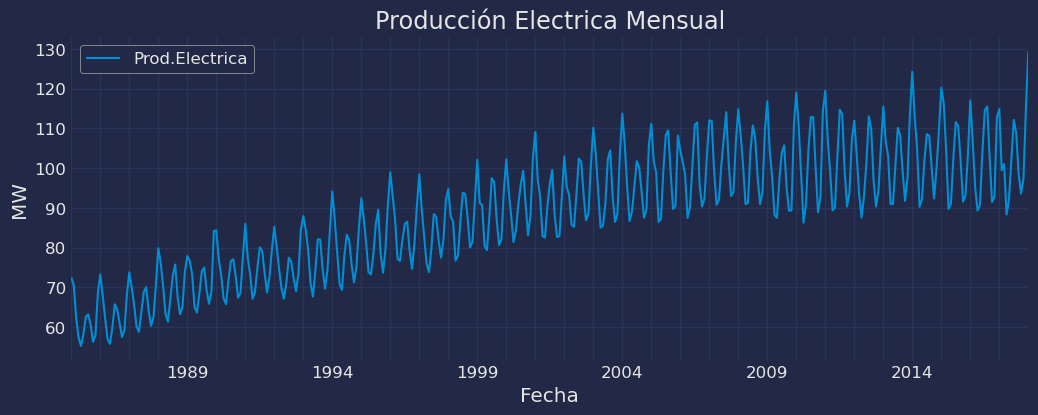

In [72]:
# Gráfico de la serie temporal
# ==============================================================================
fig, ax=plt.subplots(figsize=(11, 4))
data["Value"].plot(label="Prod.Electrica", ax=ax)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
#ax.set_ylim(bottom=160_000)
ax.set_ylabel('MW')
ax.set_title('Producción Electrica Mensual')
ax.legend();

Aquí podemos ver claramente que hay una tendencia en las series temporales y puede haber una posibilidad de presentar estacionalidad en las series temporales.

Para verificar todos los componentes de la serie temporal por descomposición, podemos usar el modelo de estadísticas de la biblioteca de Python proporcionado seasonal_decompose paquete.

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
#data = data.asfreq('MS')
data.index.freq = 'MS'
data

,Value
Fecha,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


Iniciemos haciendo una descomposición Multiplicativa.

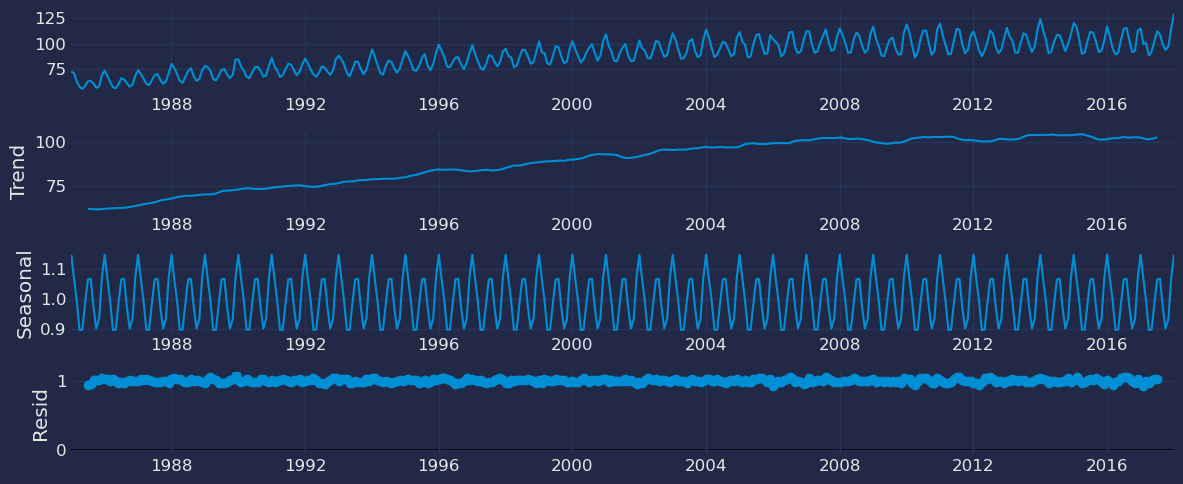

In [88]:
plt.rcParams["figure.figsize"] = (12, 5)
from statsmodels.tsa.seasonal import seasonal_decompose 
decompose_data = seasonal_decompose(data, model="mul")
decompose_data.plot()

plt.show()

Aquí podemos ver claramente por visualización que hay tendencia y la temporada está presente en la serie temporal también el residual está mostrando una nula variabilidad.

Podemos comprobarlo más con aditivos.

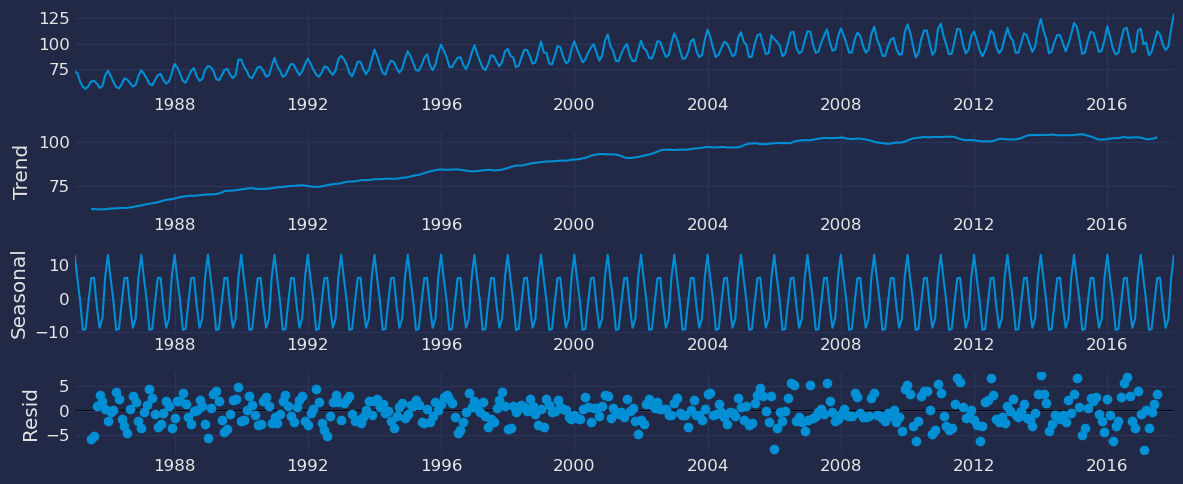

In [75]:
decompose_data = seasonal_decompose(data, model="add", )                                                 Naren Castellon
decompose_data.plot()
plt.show()

Las componentes se muestran por separado en los paneles de los gráficos anteriores. Estos componentes se pueden sumar para reconstruir los datos que se muestran en el panel superior. Tenga en cuenta que el componente estacional cambia lentamente con el tiempo, de modo que dos años consecutivos cualesquiera tienen patrones similares, pero los años separados pueden tener diferentes patrones estacionales. El componente restante que se muestra en el panel inferior es lo que queda cuando los componentes estacionales y del ciclo de tendencia se han restado de los datos.

Aquí podemos ver claramente la variabilidad del residuo en el modelo aditivo.

También podemos visualizar los componentes por separado.

Visualización de los valores observados.

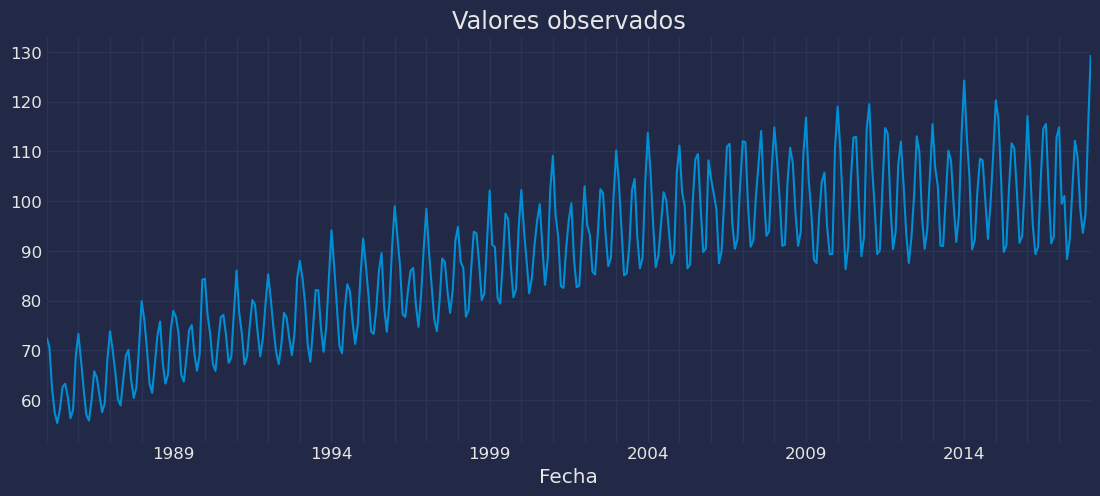

In [76]:
level = decompose_data.observed
level.plot();
plt.title("Valores observados");

Visualización de la tendencia.

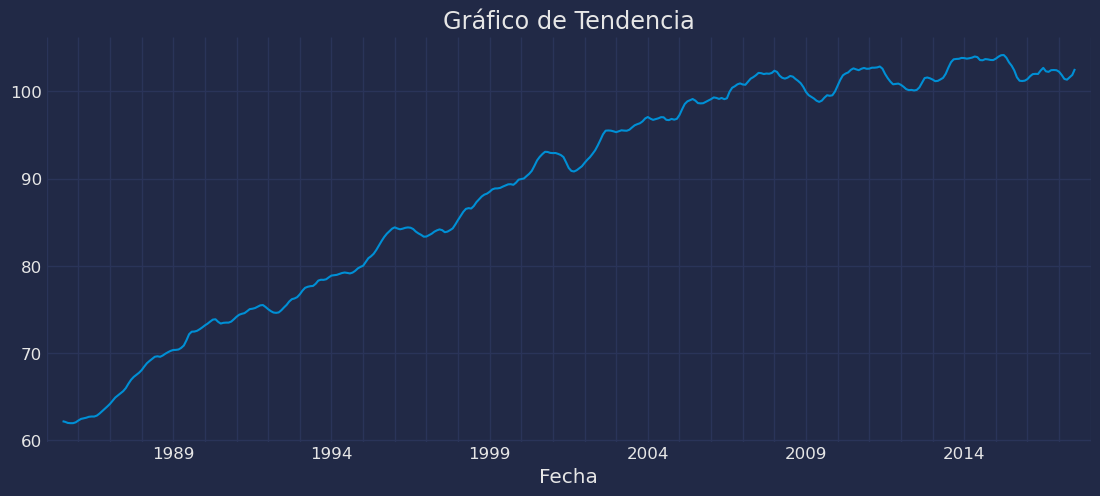

In [77]:
trend=decompose_data.trend
trend.plot()
plt.title("Gráfico de Tendencia");

Visualización de la estacionalidad.

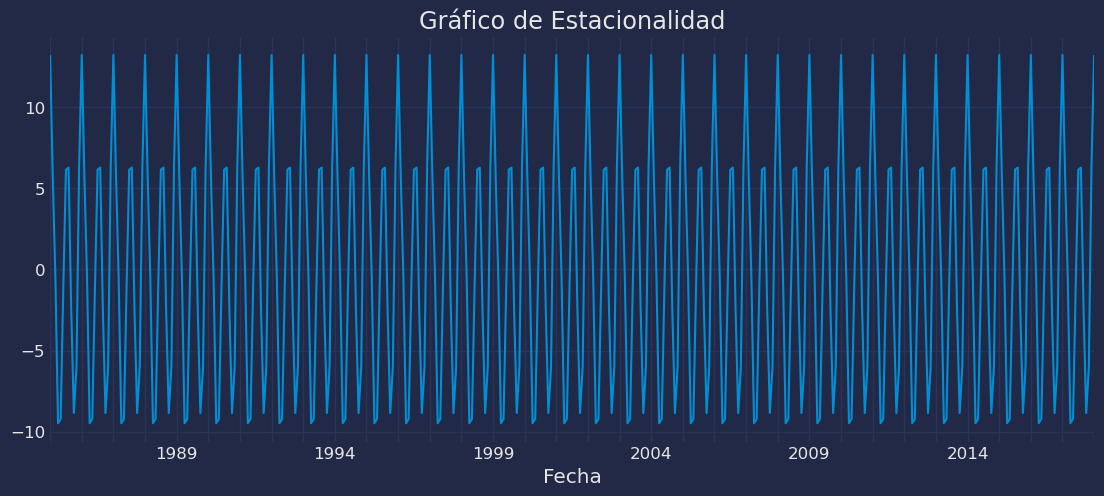

In [78]:
seasonality = decompose_data.seasonal
seasonality.plot()
plt.title("Gráfico de Estacionalidad");

Visualización del residuo.

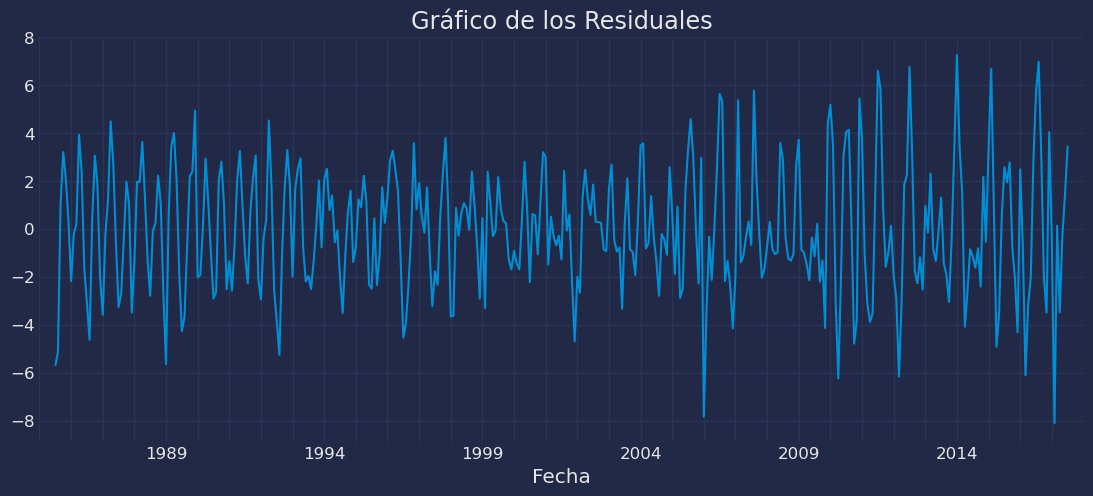

In [79]:
residual = decompose_data.resid
residual.plot()
plt.title("Gráfico de los Residuales");

También guardamos los componentes en forma tabular simplemente concatenándolos.

In [80]:
component = pd.concat([level, trend, seasonality, residual], axis=1)
#column=["level", "trend", "seasonality", "residual"]
component.tail(10)

,0,trend,seasonal,resid
Fecha,,,,
2017-04-01,88.3530,101.323075,-9.478355,-3.491720
2017-05-01,92.0805,101.596946,-9.222160,-0.294285
2017-06-01,102.1532,101.863517,-1.168424,1.458107
2017-07-01,112.1538,102.551271,6.143014,3.459515
2017-08-01,108.9312,NaN,6.274451,NaN
2017-09-01,98.6154,NaN,-2.447828,NaN
2017-10-01,93.6137,NaN,-8.853354,NaN
2017-11-01,97.3359,NaN,-6.039536,NaN
2017-12-01,114.7212,NaN,6.328085,NaN


Hemos pasado por el procedimiento de descomposición de una serie temporal. En series temporales, si los componentes están disponibles en cantidades desiguales, puede hacer que el modelo prediga valores incorrectos. Para mejorar la calidad de la predicción podemos realizar destendencias, desestacionalizar y realizar algunos métodos de suavizado sobre la misma.